# **Machine Problem No. 3: Feature Extraction and Object Detection**

# **Insert Necessary Libraries**

In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,595 kB]
Get:14 http://archi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install  opencv-python
!pip install  opencv-contrib-python
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from google.colab import files

# **Step 1: Load Images**

In [4]:
image1 = cv2.imread('/content/Lemon.jpg', 0)
image2 = cv2.imread('/content/Orange.jpg', 0)

# **Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB**

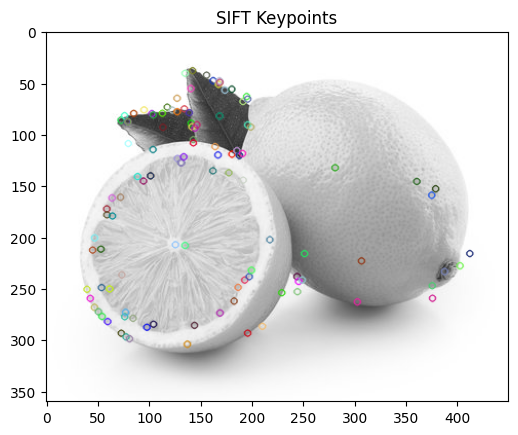

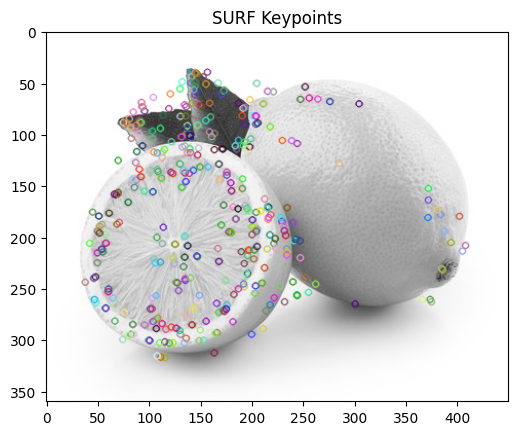

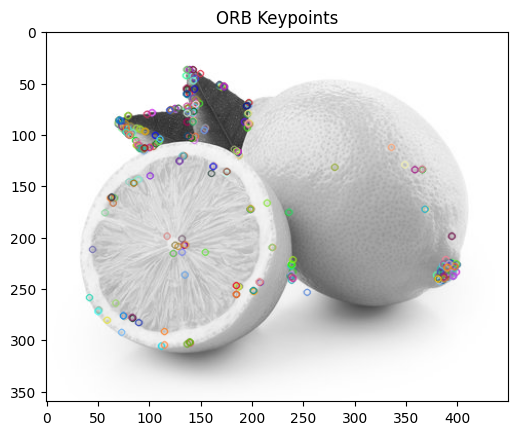

True

In [21]:
# Initialize SIFT
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Visualize SIFT keypoints
sift_keypoints_image = cv2.drawKeypoints(image1, keypoints1_sift, None)
plt.imshow(cv2.cvtColor(sift_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.savefig(f'/content/sift_keypoints.jpg')
plt.show()

# Initialize SURF (requires OpenCV contrib package)
surf = cv2.xfeatures2d.SURF_create()
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(image1, None)
keypoints2_surf, descriptors2_surf = surf.detectAndCompute(image2, None)

# Visualize SURF keypoints
surf_keypoints_image = cv2.drawKeypoints(image1, keypoints1_surf, None)
plt.imshow(cv2.cvtColor(surf_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.savefig(f'/content/surf_keypoints.jpg')
plt.show()

# Initialize ORB
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Visualize ORB keypoints
orb_keypoints_image = cv2.drawKeypoints(image1, keypoints1_orb, None)
plt.imshow(cv2.cvtColor(orb_keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.savefig(f'/content/orb_keypoints.jpg')
plt.show()


# Save keypoints visualization images
cv2.imwrite('sift_keypoints.jpg', cv2.drawKeypoints(image1, keypoints1_sift, None))
cv2.imwrite('surf_keypoints.jpg', cv2.drawKeypoints(image1, keypoints1_surf, None))
cv2.imwrite('orb_keypoints.jpg', cv2.drawKeypoints(image1, keypoints1_orb, None))


# **Step 3: Feature Matching with Brute-Force and FLANN**

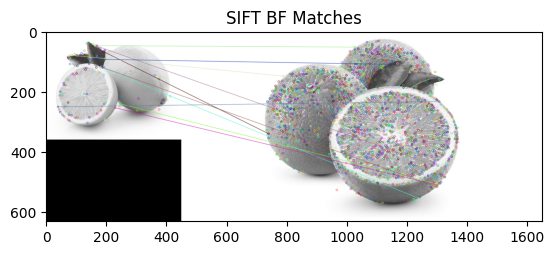

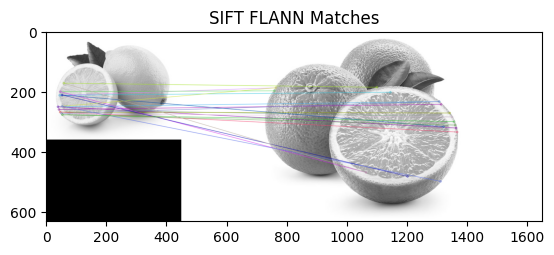

True

In [22]:
# Brute-Force Matcher for SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift_bf = bf.match(descriptors1_sift, descriptors2_sift)
matches_sift_bf = sorted(matches_sift_bf, key=lambda x: x.distance)

# Visualize Brute-Force SIFT matches
sift_bf_img = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_bf[:10], None)
plt.imshow(cv2.cvtColor(sift_bf_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT BF Matches')
plt.savefig(f'/content/sift_bf_match.jpg')
plt.show()

# FLANN Matcher for SIFT
flann_index_kdtree = 1
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_sift_flann = flann.knnMatch(descriptors1_sift, descriptors2_sift, k=2)

# Visualize FLANN matches
sift_flann_img = cv2.drawMatchesKnn(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_flann[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv2.cvtColor(sift_flann_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT FLANN Matches')
plt.savefig(f'/content/sift_flann_match.jpg')
plt.show()

# Drawing matches
sift_bf_img = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_bf[:10], None)
cv2.imwrite('sift_bf_match.jpg', sift_bf_img)

sift_flann_img = cv2.drawMatchesKnn(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift_flann[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite('sift_flann_match.jpg', sift_flann_img)


# **Step 4: Image Alignment Using Homography**

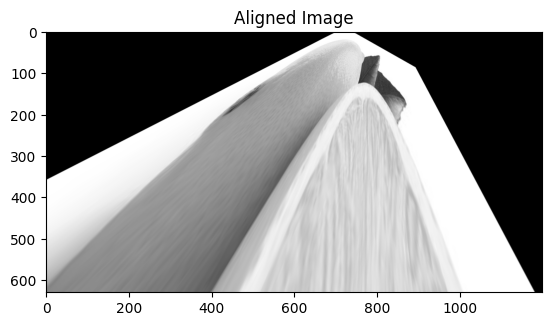

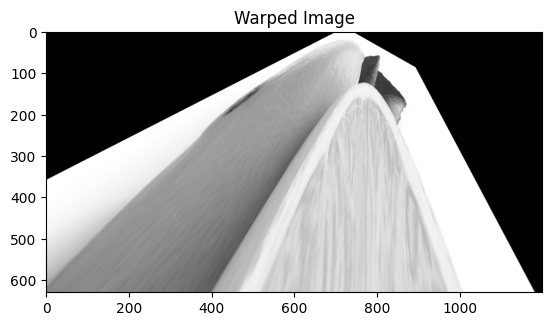

In [23]:
# Use the matched keypoints to compute the homography matrix
src_pts = np.float32([keypoints1_sift[m.queryIdx].pt for m in matches_sift_bf]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2_sift[m.trainIdx].pt for m in matches_sift_bf]).reshape(-1, 1, 2)

# Compute the homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to align with image2
aligned_image = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))

# Visualize the aligned image
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.savefig(f'/content/aligned_image.jpg')
plt.show()

# Now let's warp the original image (image1) and save the warped image for comparison
warped_image = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))

# Visualize the warped image
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.savefig(f'/content/warped_image.jpg')
plt.show()



# **Step 5: Performance Analysis**

In [11]:
# Function to analyze the performance of keypoint detection
def analyze_performance(detector_name, keypoints, descriptors, elapsed_time):
    print(f"{detector_name} Performance:")
    print(f"Number of keypoints detected: {len(keypoints)}")
    print(f"Descriptor size: {descriptors.shape if descriptors is not None else 'None'}")
    print(f"Time taken: {elapsed_time:.4f} seconds")
    print("="*50)

# Analyze SIFT performance
start_time = time.time()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
elapsed_time_sift = time.time() - start_time
analyze_performance("SIFT", keypoints1_sift, descriptors1_sift, elapsed_time_sift)

# Analyze SURF performance
start_time = time.time()
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(image1, None)
elapsed_time_surf = time.time() - start_time
analyze_performance("SURF", keypoints1_surf, descriptors1_surf, elapsed_time_surf)

# Analyze ORB performance
start_time = time.time()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
elapsed_time_orb = time.time() - start_time
analyze_performance("ORB", keypoints1_orb, descriptors1_orb, elapsed_time_orb)

# Brute-Force Matcher vs FLANN Matcher Performance
def analyze_matcher_performance(matcher_name, matches, elapsed_time):
    print(f"{matcher_name} Matcher Performance:")
    print(f"Number of matches: {len(matches)}")
    print(f"Time taken for matching: {elapsed_time:.4f} seconds")
    print("="*50)

# Brute-Force Matching performance (SIFT)
start_time = time.time()
matches_sift_bf = bf.match(descriptors1_sift, descriptors2_sift)
elapsed_time_bf = time.time() - start_time
analyze_matcher_performance("Brute-Force", matches_sift_bf, elapsed_time_bf)

# FLANN Matching performance (SIFT)
start_time = time.time()
matches_sift_flann = flann.knnMatch(descriptors1_sift, descriptors2_sift, k=2)
elapsed_time_flann = time.time() - start_time
analyze_matcher_performance("FLANN", matches_sift_flann, elapsed_time_flann)

# Compare effectiveness of Brute-Force vs FLANN
def compare_matchers(bf_matches, flann_matches):
    print("Brute-Force Matcher vs FLANN Matcher:")
    print(f"Brute-Force Number of Matches: {len(bf_matches)}")
    print(f"FLANN Number of Matches: {len([m for m, n in flann_matches if m.distance < 0.75 * n.distance])}")
    print("="*50)

compare_matchers(matches_sift_bf, matches_sift_flann)

SIFT Performance:
Number of keypoints detected: 119
Descriptor size: (119, 128)
Time taken: 0.1425 seconds
SURF Performance:
Number of keypoints detected: 366
Descriptor size: (366, 64)
Time taken: 0.2204 seconds
ORB Performance:
Number of keypoints detected: 322
Descriptor size: (322, 32)
Time taken: 0.0061 seconds
Brute-Force Matcher Performance:
Number of matches: 61
Time taken for matching: 0.0478 seconds
FLANN Matcher Performance:
Number of matches: 119
Time taken for matching: 0.1131 seconds
Brute-Force Matcher vs FLANN Matcher:
Brute-Force Number of Matches: 61
FLANN Number of Matches: 4
